# Model1: Logistic Regression Model Sklearn

## Import Libraries

In [1]:
import os
import cv2
import random
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact_manual
from random import randint

## Import Data in format RGB

In [3]:
from app import features_vectors

In [4]:
path="../images/train"
x_train,y_train=features_vectors(path,False)
path="../images/test"
x_test,y_test=features_vectors(path,False)

# Visualize Data

## Visualize some random images

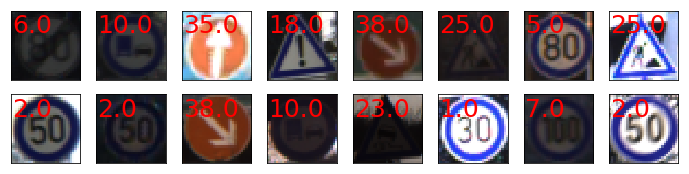

In [5]:
samples = random.sample(range(x_train.shape[0]), 16)
fig=plt.figure(figsize=(12,12))
images_sample=[]
for i,j in enumerate(samples):
    img=x_train[j]
    img=img.reshape(32,32,3)
    img = img.astype(np.uint8)
    d = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    d.imshow(img, cmap=plt.cm.bone)  
    d.text(0,10,str(y_train[j]),color="red",fontsize=25)

Use Randomized_PCA to visualize data estructure 

In [5]:
from sklearn.decomposition import RandomizedPCA

pca= RandomizedPCA(n_components=2,random_state=1999)
proj= pca.fit_transform(x_train)

/home/ncls24/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


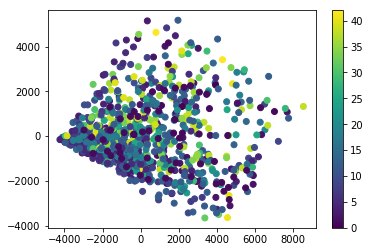

In [64]:
plt.scatter(proj[:,0],proj[:,1],c=y_train)
plt.colorbar()

# Preprocessing Data

# Shuffle Data

In [6]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=100)
x_test, y_test= shuffle(x_test, y_test, random_state=100) 

## Scale Features

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Create and train Regression Logistic Model 

In [9]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(penalty = 'l2',C =0.1)
lm.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Accuracy Model

## Training Data

In [10]:
predic= lm.predict(x_train)
matches_train = (predic == y_train)
matches_train.sum()/ float(len(matches_train))*100

99.48453608247422

## Test Data

In [11]:
predic= lm.predict(x_test)
matches_test = (predic == y_test)
matches_test.sum()/ float(len(matches_test))*100

90.53497942386831

# Classification Report

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predic))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         1
        1.0       0.94      0.94      0.94        18
        2.0       1.00      0.94      0.97        17
        3.0       0.60      0.75      0.67         4
        4.0       0.90      0.95      0.92        19
        5.0       0.86      0.67      0.75         9
        6.0       0.56      1.00      0.71         5
        7.0       1.00      0.88      0.93         8
        8.0       0.80      1.00      0.89         8
        9.0       1.00      0.91      0.95        11
       10.0       0.96      1.00      0.98        24
       11.0       1.00      1.00      1.00         8
       12.0       0.86      1.00      0.93        19
       13.0       1.00      1.00      1.00        19
       14.0       1.00      1.00      1.00         3
       15.0       1.00      1.00      1.00         1
       16.0       1.00      1.00      1.00         1
       17.0       1.00      1.00      1.00   

/home/ncls24/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
dic={
0 : "speed limit 20 (prohibitory)",1 : "speed limit 30 (prohibitory)",2 : "speed limit 50 (prohibitory)",
3 : "speed limit 60 (prohibitory)",4 : "speed limit 70 (prohibitory)",5 : "speed limit 80 (prohibitory)",
6 : "restriction ends 80 (other)",7 : "speed limit 100 (prohibitory)",8 : "speed limit 120 (prohibitory)",
9 : "no overtaking (prohibitory)",10 : "no overtaking (trucks) (prohibitory)",11 : "priority at next intersection (danger)",
12 : "priority road (other)",13 : "give way (other)",14 : "stop (other)",15 : "no traffic both ways (prohibitory)",
16 : "no trucks (prohibitory)",17 : "no entry (other)",18 : "danger (danger)",19 : "bend left (danger)",
20 : "bend right (danger)",21 : "bend (danger)",22 : "uneven road (danger)",23 : "slippery road (danger)",
24 : "road narrows (danger)",25 : "construction (danger)",26 : "traffic signal (danger)",27 : "pedestrian crossing (danger)",
28 : "school crossing (danger)",29 : "cycles crossing (danger)",30 : "snow (danger)",31 : "animals (danger)",
32 : "restriction ends (other)",33 : "go right (mandatory)",34 : "go left (mandatory)",35 : "go straight (mandatory)",
36 : "go right or straight (mandatory)",37 : "go left or straight (mandatory)",38 : "keep right (mandatory)",
39 : "keep left (mandatory)",40 : "roundabout (mandatory)",41 : "restriction ends (overtaking) (other)",
42 : "restriction ends (overtaking (trucks)) (other)"
}

# Interact Prediction Aplication 

In [14]:
def random_predic():

    X_test=sc.inverse_transform(x_test)
    sample= randint(0,X_test.shape[0])
    fig=plt.figure(figsize=(32,32))
    img=X_test[sample]
    img=img.reshape(32,32,3)
    img = img.astype(np.uint8)
    d = fig.add_subplot(8,8, 1, xticks=[], yticks=[])
    d.imshow(img, cmap=plt.cm.bone)  

    if predic[sample] == y_test[sample]:
        etiqueta = 'Correct Prediction'
    else:
        etiqueta = 'False Prediction'

    if predic[sample] == y_test[sample]:
        d.text(5, 4, etiqueta, style='oblique',fontsize=15,
        bbox={'facecolor':'green', 'alpha':0.5, 'pad':10}),
        d.text(2, 25, dic[predic[sample]], style='oblique',fontsize=10,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
    else:
        d.text(5, 4, etiqueta, style='oblique',fontsize=15,
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10}),
        d.text(2, 25, dic[predic[sample]], style='oblique',fontsize=10,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

In [15]:
interact_manual(random_predic)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.random_predic()>